# NAME - CHIRAG SINGLA
# GROUP - 4CO19
# ROLL.NO. - 101903500
# Assignment - 1 
Predicting the timeseries data for a road dataset.

In [1]:
import pandas as pd;
import numpy as np;

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Timeseriesdataset.csv to Timeseriesdataset (1).csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Timeseriesdataset.csv']))


In [19]:
df = df.iloc[:,0:15]

In [20]:
j = 0
for i in range(100):
    df.iloc[j:j + 10, 0] = df.iloc[j, 0]
    j += 10

In [21]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')
df.fillna(0, inplace=True)
tf = df.loc[df['year'] == 10]
tf

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10.0,324.0,53.6,19.0,0.0,2.0,105.0,7567.0,1885.0,16.8,105.0,65.0,9.0,1.960
19,Sec_2,10.0,327.7,62.0,22.7,0.0,2.0,102.0,30525.0,10234.0,76.5,44.3,5.0,9.0,0.795
29,Sec_3,10.0,487.7,93.2,22.5,0.0,4.0,110.0,2140.0,1270.0,78.5,0.0,0.0,16.0,1.432
39,Sec_4,10.0,543.6,93.2,22.5,0.0,4.0,110.0,2140.0,1270.0,28.5,60.5,67.0,11.0,2.004
49,Sec_5,10.0,434.4,149.0,11.7,72.0,3.0,110.0,13142.0,6225.0,0.0,276.2,34.0,6.0,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10.0,514.0,1226.4,10.1,203.6,16.0,114.0,7672.0,303.0,219.7,206.2,10.0,8.0,1.607
978,0,10.0,901.0,1531.0,11.1,34.9,40.0,100.0,15150.0,1077.0,5.9,74.5,33.0,13.0,1.087
988,0,10.0,1181.0,1364.9,9.2,274.3,24.0,112.0,12500.0,880.0,131.4,72.4,18.0,12.0,0.996
998,0,10.0,662.0,1110.7,12.8,33.2,27.0,117.0,3324.0,1356.0,193.7,305.6,180.0,12.0,2.212


In [22]:
tf.columns = tf.columns.str.replace('Unnamed: 0', 'Group')

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

In [25]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
predictcol = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
rs = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
rf = RandomForestRegressor(n_estimators = 1100, random_state = 59)
reg = ensemble.GradientBoostingRegressor(**params)

In [27]:
def bestModel(val):
    RMSE = []
    N = 0
    index = 0
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]
                reg.fit(xtrain, ytrain)
                ypred = reg.predict(xtest.reshape(1,-1))[0]
                rs[predictcol[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]
                rf.fit(xtrain, ytrain)
                ypred = rf.predict(xtest.reshape(1,-1))[0]
                rs[predictcol[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [ ]:
import catboost as cb
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
model = cb.CatBoostRegressor(loss_function=’RMSE’)

In [28]:
result_RMSE, result_count = bestModel(1)
dataset_predicted = pd.DataFrame.from_dict(rs)
dataset_predicted

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.505273,53.675000,37.309091,7.599091,1.893909
1,56.100545,27.854000,0.900909,7.620909,0.788596
2,63.373909,0.000000,0.000000,11.247273,1.364399
3,15.703545,52.988364,57.025455,7.018182,1.791125
4,0.000000,247.237818,33.822727,5.854545,1.685070
...,...,...,...,...,...
95,0.000000,92.421000,13.766364,3.789091,1.320697
96,109.428273,160.992182,5.877273,6.476364,1.417252
97,0.092727,29.236455,12.440000,10.365455,1.036573
98,44.425455,33.599182,8.418182,9.158182,0.778187


In [29]:
for i in result_RMSE:
    req = (i/result_count)**0.5
    print(req)

69.09309784010534
69.67374608343727
27.88174607989906
15.049568563322634
0.3041764169714353


In [30]:
reqq = (sum(result_RMSE)/500)**0.5
reqq

46.11347062223882

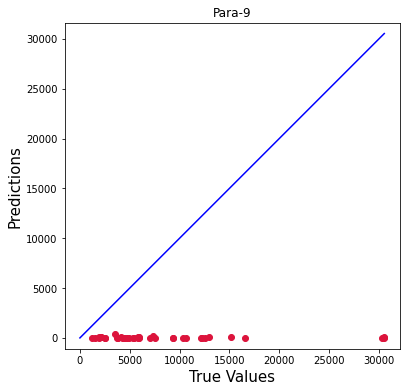

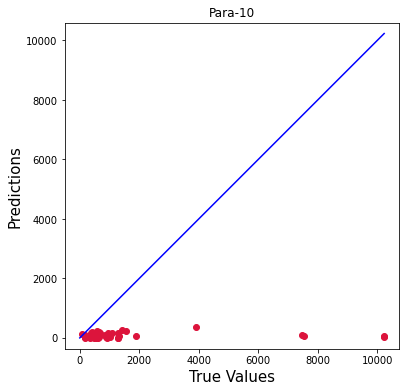

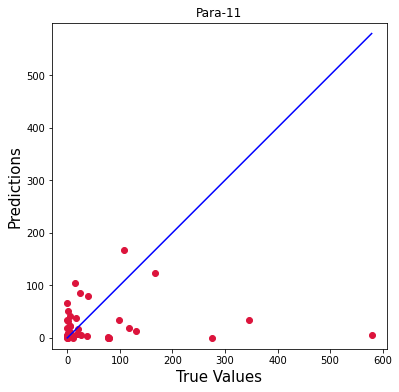

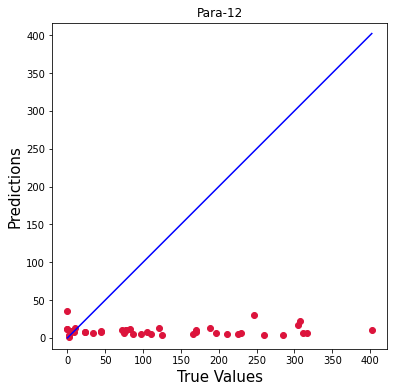

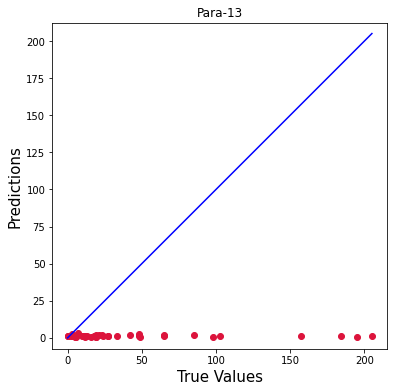

In [34]:
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = tf.iloc[ind, i+8]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predictcol[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    # plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
    # plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
    # plt.xlabel('Number of Values')
    # plt.ylabel('Values')
    # plt.title('True vs Predicted Values of Para-11')
    # plt.legend(loc = 'upper right')